# Numpy
#Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this tutorial useful to get started with Numpy.

# Array
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.
We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [3]:
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


# Numpy also provides many functions to create arrays:

In [4]:
import numpy as np

a = np.zeros((2,2))   # Create an array of all zeros
print("a= ",a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print("b= ",b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print("c= ",c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print("d= ",d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print("e= ",e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.95810211 0.96115535]
 [0.73298589 0.09375653]]


# Array indexing
Numpy offers several ways to index into arrays.

# Slicing: 

Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [19]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


 # You can also mix integer indexing with slice indeX

In [6]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


# Integer array indexing: 
When you index into numpy arrays using slicing, 
the resulting array view will always be a subarray of the original array. 
In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. 
Here is an example:

In [7]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 2]
[2 2]


# One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [8]:
import numpy as np

# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


# Boolean array indexing: 
 Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [9]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


# Data types
Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [10]:
import numpy as np

x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)    

int32
float64
int64


# Array math
Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [11]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


 The * is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [12]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is sum:

In [13]:
import numpy as np

x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [14]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


# Broadcasting
Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.
For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [15]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix x is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix x is equivalent to forming a matrix vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv. We could implement this approach like this:

In [16]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [17]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


# NumPy Arithmetic Operations
Using Python NumPy functions or operators solve arithmetic operations.




Addition of Two Numpy Array
# Using + Operator

In [19]:
import numpy as np
arr1 = np.arange(1,10).reshape(3,3)
arr2 = np.arange(1,10).reshape(3,3)
 
# print arr1 and arr2
print(arr1)
print(arr2)
arr3=arr1 + arr2
print(arr3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


# using np.add() function

In [20]:
import numpy as np
arr1 = np.arange(1,10).reshape(3,3)
arr2 = np.arange(1,10).reshape(3,3)
 
# print arr1 and arr2
print(arr1)
print(arr2)
arr3=np.add(arr1,arr2)
print(arr3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


Subtraction of Two NumPy Array
# using – Operator

In [21]:
import numpy as np
arr1 = np.array([1,2,3])  # v has shape (3,)
arr2 = v = np.array([5,5,6])  # v has shape (3,)
arr5=arr1 - arr2
print(arr5)

[-4 -3 -3]


# Using np.subtract() function

In [22]:
import numpy as np
arr1 = np.array([1,2,3])  # v has shape (3,)
arr2 = v = np.array([5,5,6])  # v has shape (3,)
arr5=np.subtract(arr1,arr2)
print(arr5)

[-4 -3 -3]


# Division of Two NumPy Array
# using / Operator

In [23]:
import numpy as np
arr1 = np.array([1,2,3])  # v has shape (3,)
arr2 =  np.array([5,5,6])  # v has shape (3,)
arr5=arr1/arr2
print(arr5)

[0.2 0.4 0.5]


# Using np.divide() function

In [24]:
import numpy as np
arr1 = np.array([1,2,3])  # v has shape (3,)
arr2 =  np.array([5,5,6])  # v has shape (3,)
arr5=np.divide(arr1,arr2)
print(arr5)

[0.2 0.4 0.5]


# Multiplication of Two NumPy Array
# using * Operator

In [25]:
import numpy as np
arr1 = np.array([1,2,3])  # v has shape (3,)
arr2 =  np.array([5,5,6])  # v has shape (3,)
arr5=arr1*arr2
print(arr5)

[ 5 10 18]


# Using np.multiply() function

In [75]:
import numpy as np
arr1 = np.array([1,2,8])  # v has shape (3,)
arr2 =  np.array([5,5,6])  # v has shape (3,)
arr5=np.multiply(arr1,arr2)
print(arr5)

[ 5 10 48]


# Matrix Product of Two NumPy Array (matrix)
# using @ Operator

In [27]:
import numpy as np
arr1 = np.arange(1,10).reshape(3,3)
arr2 = np.arange(1,10).reshape(3,3)
 
# print arr1 and arr2
print(arr1)
print(arr2)
arr3=arr1 @ arr2
print(arr3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]


# Using np.dot() function

In [28]:
import numpy as np
arr1 = np.arange(1,10).reshape(3,3)
arr2 = np.arange(1,10).reshape(3,3)
 
# print arr1 and arr2
print(arr1)
print(arr2)
arr3=arr1 .dot(arr2)
print(arr3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]


# NumPy Mathematical Built-in functions
# np.max()
To find maximum value from an array.
# np.argmax
 return index of max value of an array

In [29]:
import numpy as np
arr1 = np.arange(1,10).reshape(3,3)
print(arr1.max())## return  max value of an array
print(arr1.max(axis = 0)) # return max value from each column)

print(arr1.argmax())# return index of max value of an array

9
[7 8 9]
8


# np.min()

To find minimum value from an array.

# np.argmin()
return index of min value of an array
# np.sum()

Return sumation of NuPy array.
# np.mean()

Return mean of NumPy array.
# np.sqrt()

Return square root of each element of NumPy array.
# np.std()

Return standerd division of Numpy array.
# np.exp()

Return exponential value of each element of the NumPy array.

# np.log()

Return natural log of each element of NumPy array.

# np.log10()

Return log to the base 10 value of each element of NumPy array.


In [16]:
import numpy as np
arr1 = np.arange(1,10).reshape(3,3)
print(np.sum(arr1))  #return  sum of  values of an array
print(np.mean(arr1)) #return  mean of  values of an array
print(np.sqrt(arr1)) 
print(np.exp(arr1))
print(np.std(arr1))
print(np.log(arr1))
print(np.log10(arr1))


45
5.0
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]
 [2.64575131 2.82842712 3.        ]]
[[2.71828183e+00 7.38905610e+00 2.00855369e+01]
 [5.45981500e+01 1.48413159e+02 4.03428793e+02]
 [1.09663316e+03 2.98095799e+03 8.10308393e+03]]
2.581988897471611
[[0.         0.69314718 1.09861229]
 [1.38629436 1.60943791 1.79175947]
 [1.94591015 2.07944154 2.19722458]]
[[0.         0.30103    0.47712125]
 [0.60205999 0.69897    0.77815125]
 [0.84509804 0.90308999 0.95424251]]


# Convolution 
Convolution is a simple mathematical operation which is fundamental to many common image processing operators. Convolution provides a way of multiplying together two arrays of numbers, generally of different sizes, but of the same dimensionality, to produce a third array of numbers of the same dimensionality. 
In Numpy ,we can use the function below:

# np.convolve()


In [32]:
import numpy as np
arr1 = np.array([1,2,3,4,5,6,7,8,9])  # v has shape (3,)
arr2 =  np.array([1,2,3])  # v has shape (3,)
arr5=np.convolve(arr1,arr2)
print(arr5)

[ 1  4 10 16 22 28 34 40 46 42 27]


In [31]:

import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
x = np.array([5,3,8,10,2,1,5,1,0,2])
y=moving_average(x, 2)
print(x)
print(y)


[ 5  3  8 10  2  1  5  1  0  2]
[4.  5.5 9.  6.  1.5 3.  3.  0.5 1. ]


# What is a Random Number?
Random number does NOT mean a different number every time. Random means something that can not be predicted logically.

# Pseudo Random and True Random.
Computers work on programs, and programs are definitive set of instructions. So it means there must be some algorithm to generate a random number as well.

If there is a program to generate random number it can be predicted, thus it is not truly random.

Random numbers generated through a generation algorithm are called pseudo random.

Can we make truly random numbers?

Yes. In order to generate a truly random number on our computers we need to get the random data from some outside source. This outside source is generally our keystrokes, mouse movements, data on network etc.

We do not need truly random numbers, unless its related to security (e.g. encryption keys) or the basis of application is the randomness (e.g. Digital roulette wheels).



# Example: Generate a random integer from 0 to 100:

In [49]:
import numpy as np
x = np.random.randint(100)
print(x)
# or there is other way 
from numpy import random
x = random.randint(100)
print(x)

1
70


# Generate Random Float
The random module's rand() method returns a random float between 0 and 1.

# Example
Generate a random float from 0 to 1:

In [57]:
from numpy import random

x = random.rand()

print(x)

0.8155927562607435


# Generate Random Array
In NumPy we work with arrays, and you can use the two methods from the above examples to make random arrays.

Integers
The randint() method takes a size parameter where you can specify the shape of an array.

# Example
Generate a 1-D array containing 5 random integers from 0 to 100:

In [58]:
from numpy import random

x=random.randint(100, size=(5))

print(x)

[21 65 51 90  2]


# Example
Generate a 2-D array with 3 rows, each row containing 5 random integers from 0 to 100:

In [59]:
from numpy import random

x = random.randint(100, size=(3, 5))

print(x)

[[60 76 13  1 57]
 [51 36 34  0 36]
 [65 35 94 74 67]]


# Floats
The rand() method also allows you to specify the shape of the array.

# Example
Generate a 1-D array containing 5 random floats:

In [53]:
from numpy import random

x = random.rand(5)

print(x)

[0.12583323 0.05579099 0.49011314 0.39571836 0.20821422]


# Example
Generate a 2-D array with 3 rows, each row containing 5 random numbers:

In [54]:
from numpy import random

x = random.rand(3, 5)

print(x)

[[0.25192191 0.83763996 0.64144887 0.3961455  0.21057909]
 [0.0811478  0.08256451 0.80975502 0.18746291 0.65163717]
 [0.75079609 0.47065722 0.05551843 0.98997985 0.25633599]]


# NumPy Joining Array
# Joining NumPy Arrays
Joining means putting contents of two or more arrays in a single array.

In SQL we join tables based on a key, whereas in NumPy we join arrays by axes.

We pass a sequence of arrays that we want to join to the concatenate() function, along with the axis. If axis is not explicitly passed, it is taken as 0.

# Example
Join two arrays

In [55]:
import numpy as np

arr1 = np.array([1, 2, 3])

arr2 = np.array([4, 5, 6])

arr = np.concatenate((arr1, arr2))

print(arr)

[1 2 3 4 5 6]


# Example
Join two 2-D arrays along rows (axis=1):

In [69]:
import numpy as np

arr1 = np.array([[1, 2], [3, 4]])

arr2 = np.array([[5, 6], [7, 8]])

arr = np.concatenate((arr1, arr2), axis=1)

print("arr= ",arr)
print(np.shape(arr))

arr=  [[1 2 5 6]
 [3 4 7 8]]
(2, 4)


# Generate evenly spaced samples, calculated over the interval [start, stop].
# np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)

# np.arange
Similar to linspace, but uses a step size (instead of the number of samples).

# np.geomspace
Similar to linspace, but with numbers spaced evenly on a log scale (a geometric progression).

# np.logspace
Similar to geomspace, but with the end points specified as logarithms.

In [65]:
x=np.linspace(2.0, 3.0, num=5)
print(" x= ",x)
x1=np.arange(2,3,0.2)
print("x1= ",x1)
x2=np.linspace(2.0, 3.0, num=5, endpoint=False)
print("x2= ",x2)


 x=  [2.   2.25 2.5  2.75 3.  ]
x1=  [2.  2.2 2.4 2.6 2.8]
x2=  [2.  2.2 2.4 2.6 2.8]


In [14]:
import numpy as np
x=np.linspace(0,2*np.pi, num=100)
print(" x= ",x)
x1=np.arange(2,3,0.2)
print("x1= ",x1)
x2=np.linspace(2.0, 3.0, num=5, endpoint=False)
print("x2= ",x2)

 x=  [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.6

# NumPy: Calculate round, floor, ceiling, truncated and round of the input, element-wise of a given array




In [64]:
import numpy as np
x = np.array([3.1, 3.5, 4.5, 2.9, -3.1, -3.5, -5.9])
print("Original array: ")
print(x)
r1 = np.around(x)
r2 = np.floor(x)
r3 = np.ceil(x)
r4 = np.trunc(x)
r5 = [round(elem) for elem in x]

print("\naround:   ", r1)
print("floor:    ",r2)
print("ceil:     ",r3)
print("trunc:    ",r4)
print("round:    ",r5)

Original array: 
[ 3.1  3.5  4.5  2.9 -3.1 -3.5 -5.9]

around:    [ 3.  4.  4.  3. -3. -4. -6.]
floor:     [ 3.  3.  4.  2. -4. -4. -6.]
ceil:      [ 4.  4.  5.  3. -3. -3. -5.]
trunc:     [ 3.  3.  4.  2. -3. -3. -5.]
round:     [3, 4, 4, 3, -3, -4, -6]


# numpy.fft.fft
fft.fft(a, n=None, axis=- 1, norm=None)[source]
Compute the one-dimensional discrete Fourier Transform.

This function computes the one-dimensional n-point discrete Fourier Transform (DFT) with the efficient Fast Fourier Transform (FFT) algorithm [CT].

# Notes:
FFT (Fast Fourier Transform) refers to a way the discrete Fourier Transform (DFT) can be calculated efficiently, by using symmetries in the calculated terms. The symmetry is highest when n is a power of 2, and the transform is therefore most efficient for these sizes.

The DFT is defined, with the conventions used in this implementation, in the documentation for the numpy.fft module.

In [73]:
x=np.exp( np.arange(8) / 8)
y=np.fft.fft(x)
print("x=",x)
print("y=",y)

x= [1.         1.13314845 1.28402542 1.45499141 1.64872127 1.86824596
 2.11700002 2.39887529]
y= [12.90500782+0.j         -0.50108701+2.02019372j -0.75230416+0.8524723j
 -0.79635553+0.35424452j -0.80551442+0.j         -0.79635553-0.35424452j
 -0.75230416-0.8524723j  -0.50108701-2.02019372j]


# Matplotlib Pyplot Library

# Plots

Using Pyplot from matplotlib module.
matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
It can be used to create a figure, create a plotting area in a figure, plot some lines in a plotting area, decorate the plot with labels, etc.


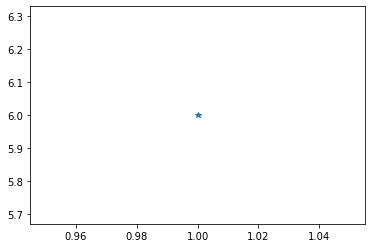

In [21]:
import matplotlib.pyplot as plt
x=1
y=6
plt.plot(x,y,'*')

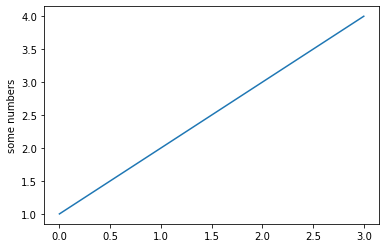

In [4]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3].
plot() is a versatile command, and will take an arbitrary number of arguments. For example, to plot x versus y, you can issue the command:

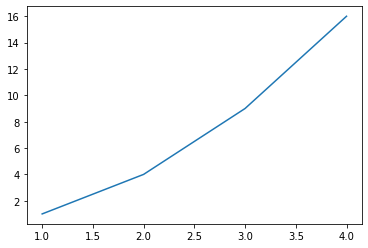

In [5]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

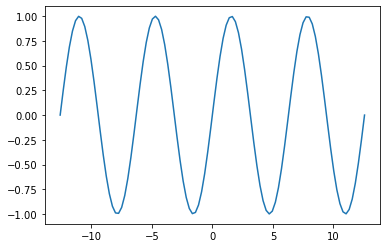

In [17]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-4*np.pi,4*np.pi, num=100)
y=np.sin(x)
plt.plot(x,y)

# Formatting the style of your plot
For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would issue

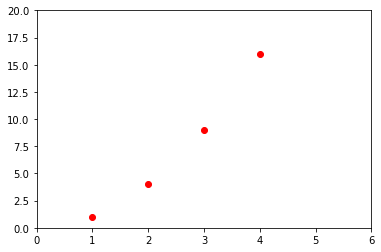

In [6]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()



If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates a plotting several lines with different format styles in one command using arrays.

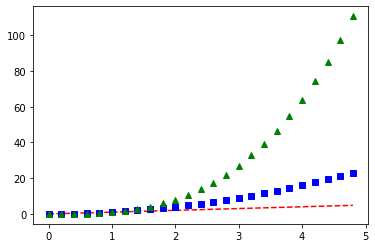

In [37]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# Plotting with keyword strings
There are some instances where you have data in a format that lets you access particular variables with strings. For example, with numpy.recarray or pandas.DataFrame.

Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

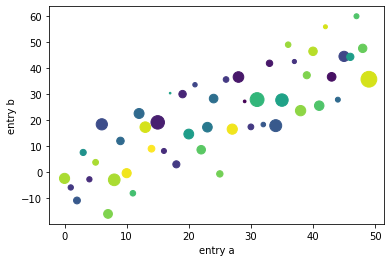

In [38]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

# Plotting with categorical variables
It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

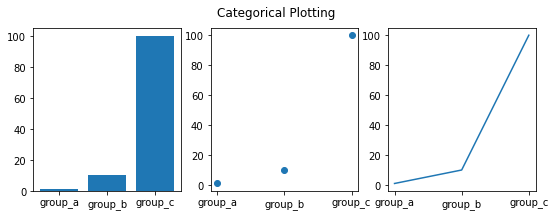

In [11]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

# Pandas Library

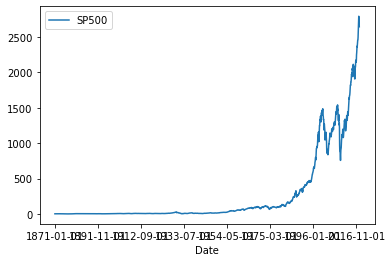

[['1871-01-01' 4.44]
 ['1871-02-01' 4.5]
 ['1871-03-01' 4.61]
 ...
 ['2018-02-01' 2705.16]
 ['2018-03-01' 2702.77]
 ['2018-04-01' 2642.19]]


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df = pd.DataFrame(df,columns=['Date','SP500'])
#print (df)
df.plot(x='Date',y='SP500')
plt.show()

t=df.to_numpy()
print(t)

